In [ ]:
#xml to csv conversion
import xml.etree.ElementTree as ET
import csv

xml_file_path = '/content/data_aqi_cpcb.xml'
csv_file_path = 'IndiaAQIcsv'

tree = ET.parse(xml_file_path)
root = tree.getroot()


with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    header = [
        "Country", "State", "City", "Station", "Latitude", "Longitude", "Last Update",
        "Pollutant", "Min", "Max", "Avg", "AQI", "Predominant Parameter"
    ]
    writer.writerow(header)


    for country in root.findall('Country'):
        country_id = country.get('id')
        for state in country.findall('State'):
            state_id = state.get('id')
            for city in state.findall('City'):
                city_id = city.get('id')
                for station in city.findall('Station'):
                    station_id = station.get('id')
                    latitude = station.get('latitude')
                    longitude = station.get('longitude')
                    last_update = station.get('lastupdate')


                    for pollutant in station.findall('Pollutant_Index'):
                        pollutant_id = pollutant.get('id')
                        min_val = pollutant.get('Min')
                        max_val = pollutant.get('Max')
                        avg_val = pollutant.get('Avg')


                        aqi_value = ""
                        predominant_param = ""


                        aqi = station.find('Air_Quality_Index')
                        if aqi is not None:
                            aqi_value = aqi.get('Value')
                            predominant_param = aqi.get('Predominant_Parameter')


                        writer.writerow([
                            country_id, state_id, city_id, station_id, latitude, longitude,
                            last_update, pollutant_id, min_val, max_val, avg_val,
                            aqi_value, predominant_param
                        ])

print("XML data has been successfully converted to CSV!")

XML data has been successfully converted to CSV!


In [ ]:
#download csv
import shutil
from google.colab import files

# Rename file with .csv extension
csv_file_path = "IndiaAQI.csv"
shutil.move("IndiaAQIcsv", csv_file_path)

# Download the CSV file
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#basic data exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/IndiaAQI.csv")
print(df.head())

  Country           State       City                         Station  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

    Latitude  Longitude          Last Update Pollutant  Min  Max  Avg  AQI  \
0  16.515083  80.518167  20-11-2023 12:00:00     PM2.5  NaN  NaN  NaN  NaN   
1  16.515083  80.518167  20-11-2023 12:00:00      PM10  NaN  NaN  NaN  NaN   
2  16.515083  80.518167  20-11-2023 12:00:00       SO2  NaN  NaN  NaN  NaN   
3  16.515083  80.518167  20-11-2023 12:00:00        CO  NaN  NaN  NaN  NaN   
4  16.515083  80.518167  20-11-2023 12:00:00     OZONE  NaN  NaN  NaN  NaN   

  Predominant Parameter  
0                   NaN  
1                   NaN  
2                   

In [ ]:
#check for null values
print(df.isnull().sum())

Country                    0
State                      0
City                       0
Station                    0
Latitude                   0
Longitude                  0
Last Update                0
Pollutant                  0
Min                      220
Max                      220
Avg                      220
AQI                      243
Predominant Parameter    243
dtype: int64


In [ ]:
#check data types and objects
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                3285 non-null   object 
 1   State                  3285 non-null   object 
 2   City                   3285 non-null   object 
 3   Station                3285 non-null   object 
 4   Latitude               3285 non-null   float64
 5   Longitude              3285 non-null   float64
 6   Last Update            3285 non-null   object 
 7   Pollutant              3285 non-null   object 
 8   Min                    3065 non-null   float64
 9   Max                    3065 non-null   float64
 10  Avg                    3065 non-null   float64
 11  AQI                    3042 non-null   float64
 12  Predominant Parameter  3042 non-null   object 
dtypes: float64(6), object(7)
memory usage: 333.8+ KB
None


In [ ]:
#check and fill for null values
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)
print(df.isnull().sum())

Country                  0
State                    0
City                     0
Station                  0
Latitude                 0
Longitude                0
Last Update              0
Pollutant                0
Min                      0
Max                      0
Avg                      0
AQI                      0
Predominant Parameter    0
dtype: int64


In [ ]:
#dataset stats
print(df.describe())

          Latitude    Longitude          Min          Max          Avg  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000   
mean     22.795529    78.455119    34.095269   100.117455    60.659054   
std       5.416659     4.800781    44.156667   110.883612    73.399435   
min       8.514909    70.909168     1.000000     1.000000     1.000000   
25%      19.063214    75.467934     6.000000    21.000000    13.000000   
50%      23.500160    77.296291    18.000000    67.000000    35.000000   
75%      27.213494    80.262850    39.000000   119.000000    71.000000   
max      34.066206    94.636574   357.000000   500.000000   419.000000   

               AQI  
count  3285.000000  
mean    162.007890  
std      95.314515  
min      15.000000  
25%      87.000000  
50%     145.000000  
75%     227.000000  
max     419.000000  


In [ ]:
print(df['Country'].value_counts())

Country
India    3285
Name: count, dtype: int64


In [ ]:
print(df['State'].value_counts())

State
Maharashtra         569
Uttar_Pradesh       359
Rajasthan           313
Karnataka           265
Delhi               245
Bihar               223
Haryana             200
Madhya Pradesh      148
TamilNadu           119
Odisha              119
Gujarat             112
West_Bengal          98
Telangana            93
Chhattisgarh         79
Andhra_Pradesh       75
Assam                61
Punjab               51
Kerala               41
Chandigarh           21
Uttarakhand          20
Meghalaya            14
Mizoram               7
Nagaland              7
Puducherry            7
Sikkim                7
Jammu_&_Kashmir       7
Himachal Pradesh      7
Tripura               7
Manipur               6
Jharkhand             5
Name: count, dtype: int64


In [ ]:
print(df['City'].value_counts())

City
Delhi        245
Mumbai       190
Hyderabad     93
Bengaluru     80
Ahmedabad     62
            ... 
Udupi          4
Damoh          4
Nandesari      4
Ratlam         4
Bilaspur       3
Name: count, Length: 264, dtype: int64


In [ ]:
print(df['Pollutant'].value_counts())

Pollutant
PM2.5    486
PM10     482
NO2      479
CO       474
SO2      470
OZONE    466
NH3      428
Name: count, dtype: int64


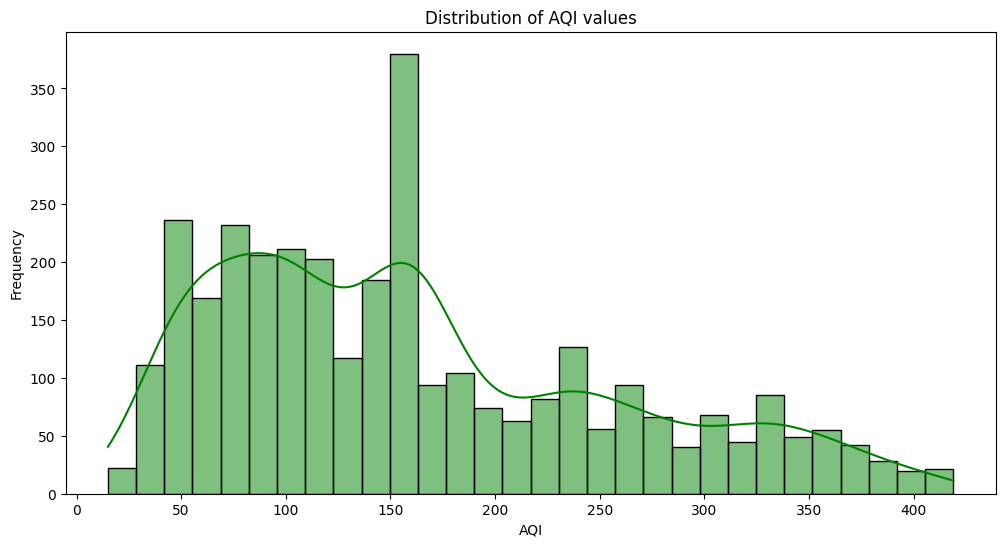

In [ ]:
#histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI'], bins=30, kde=True,color='green')
plt.title('Distribution of AQI values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

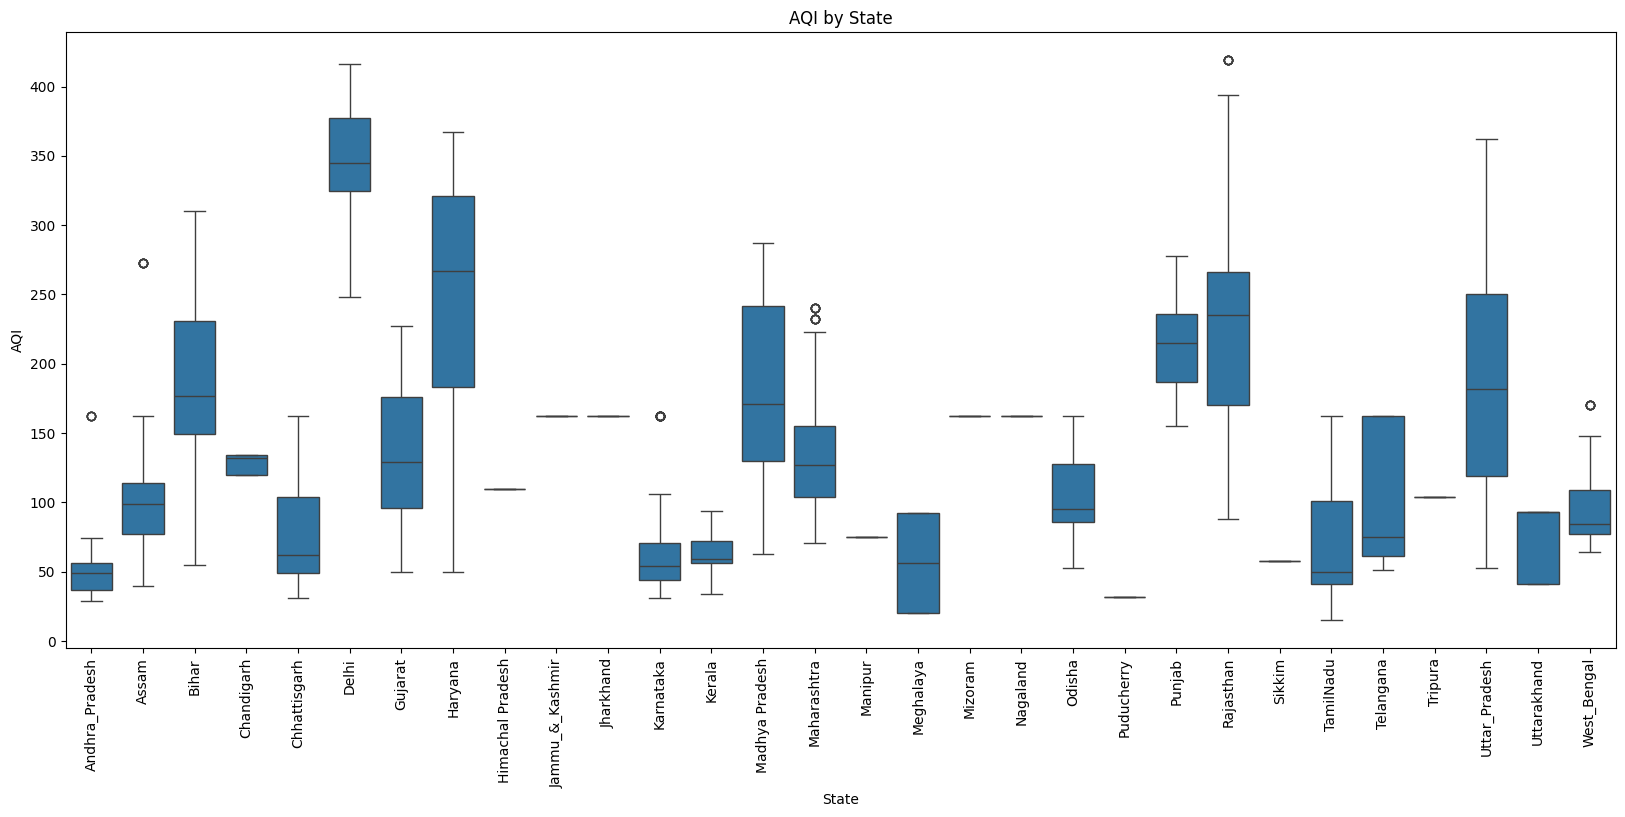

In [ ]:
#box plot
plt.figure(figsize=(20, 8))
sns.boxplot(x='State', y='AQI', data=df)
plt.title('AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

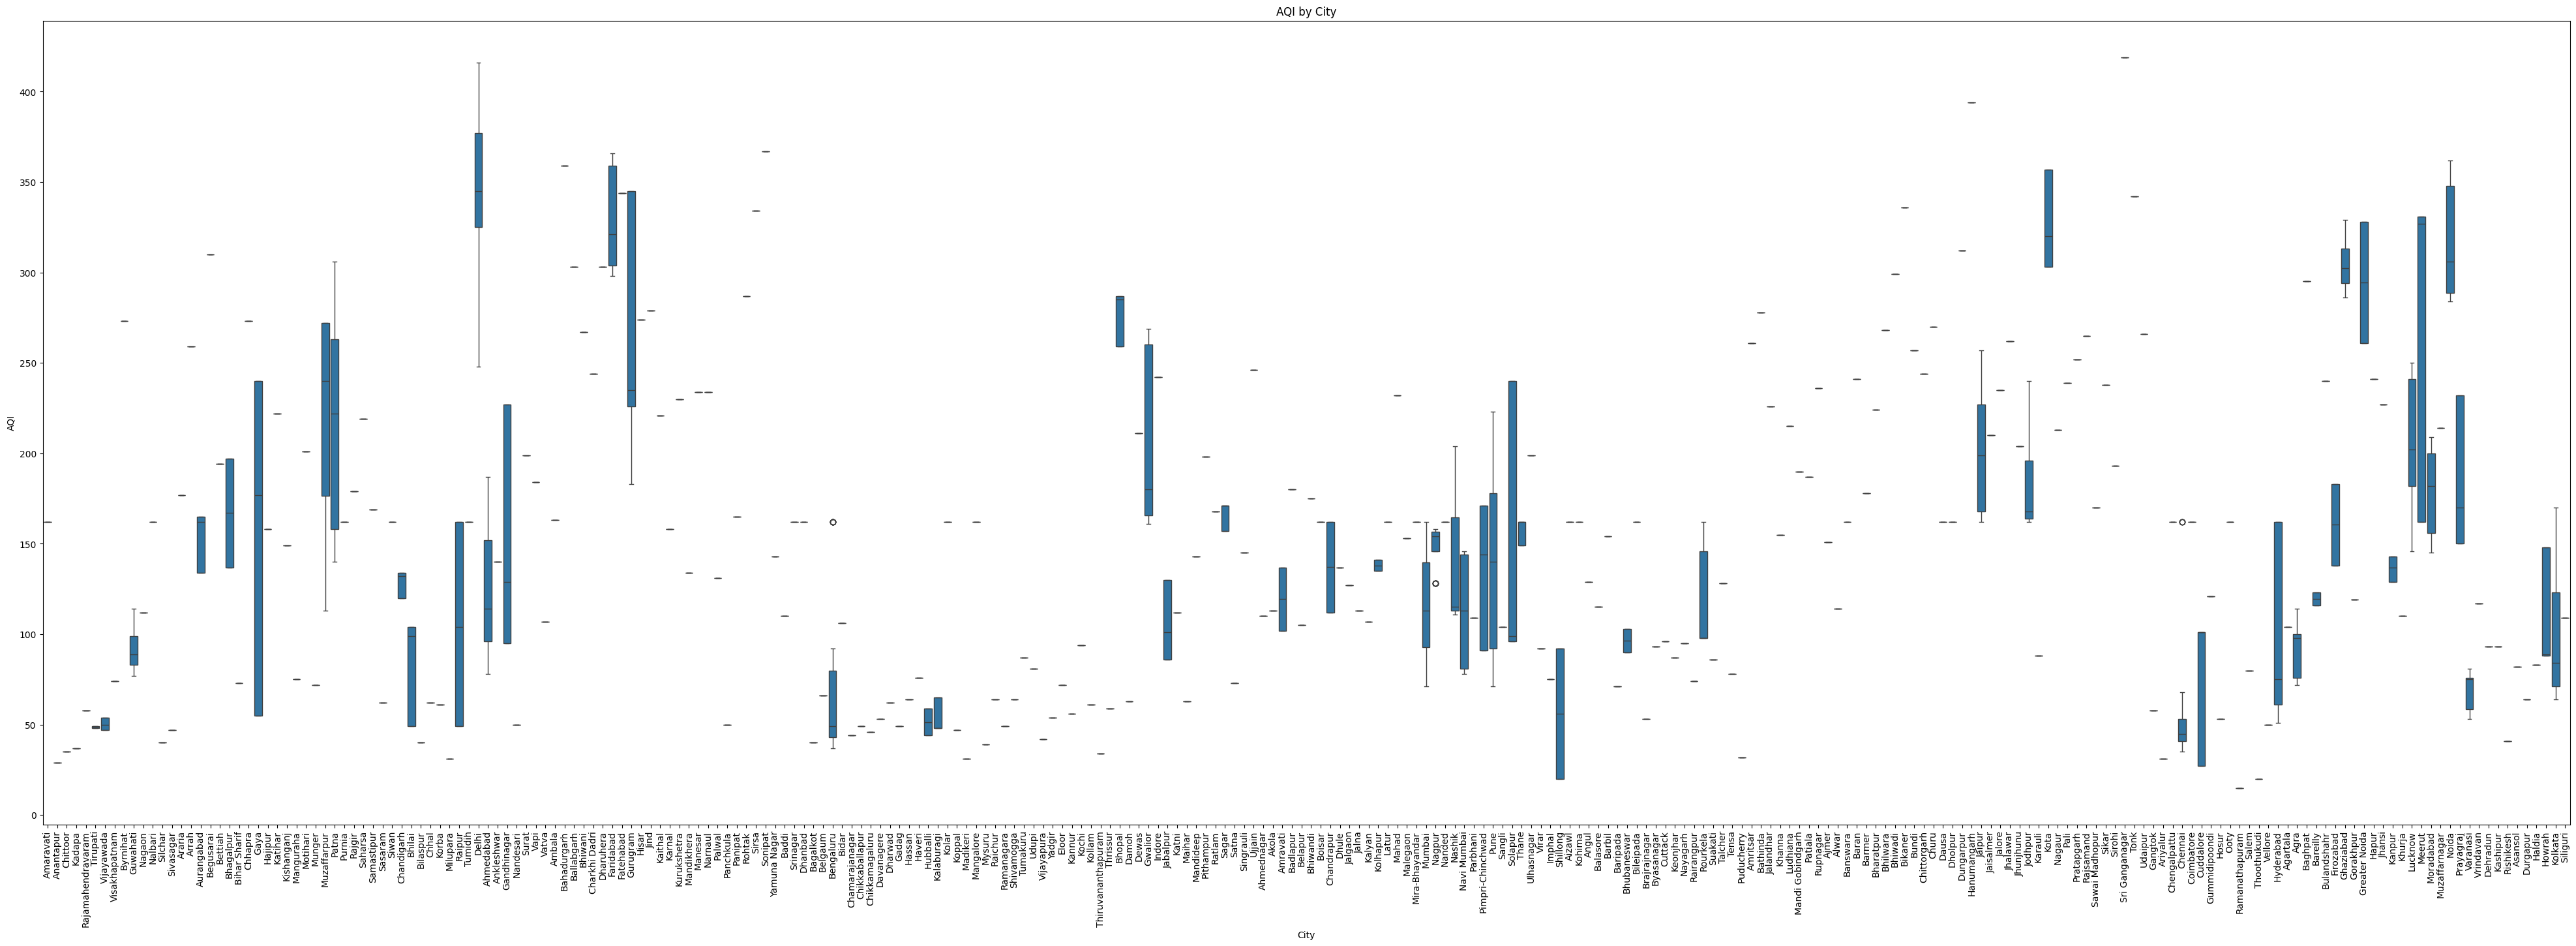

In [ ]:
#box plot
plt.figure(figsize=(50, 16))
sns.boxplot(x='City', y='AQI', data=df)
plt.title('AQI by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

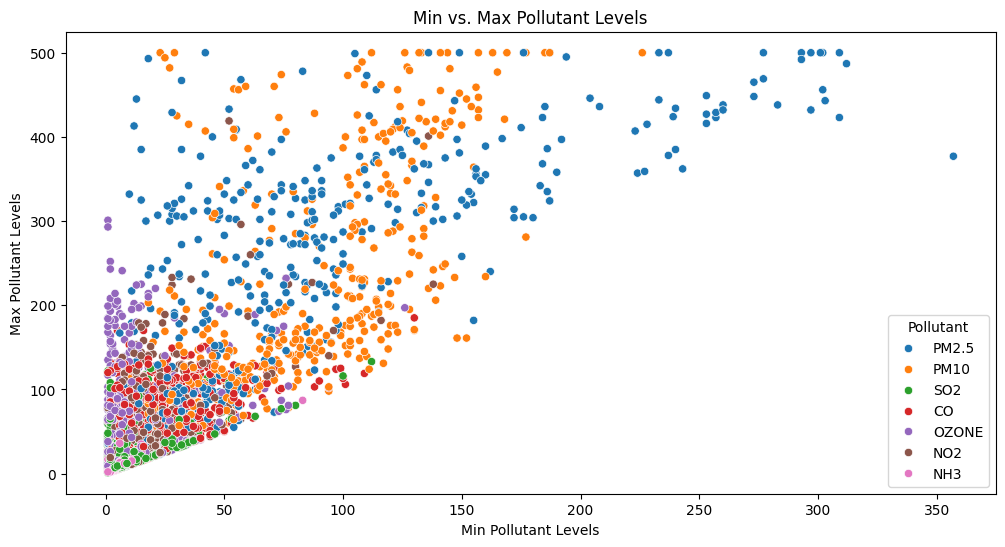

In [ ]:
#scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Min', y='Max', hue='Pollutant', data=df)
plt.title('Min vs. Max Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('Max Pollutant Levels')
plt.show()

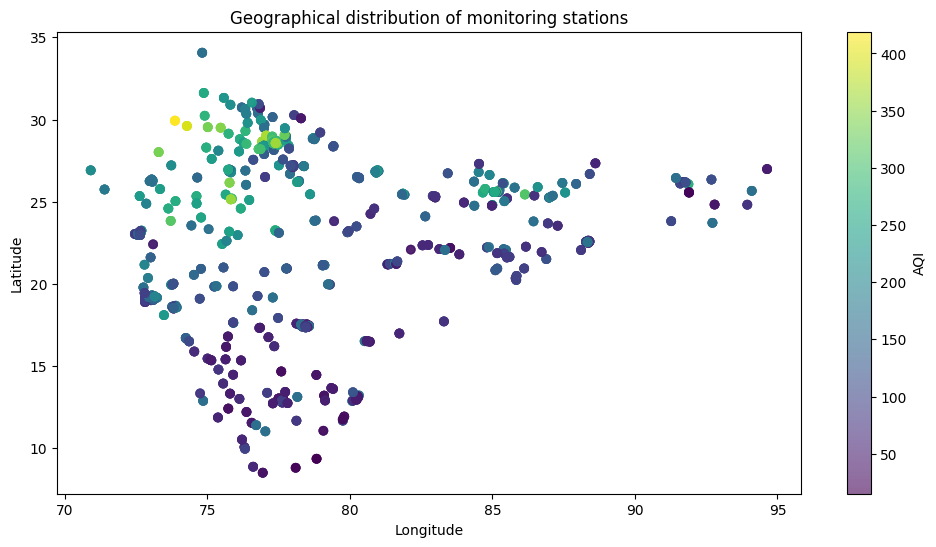

In [ ]:
#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['AQI'], cmap='viridis', alpha=0.6)
plt.colorbar(label='AQI')
plt.title('Geographical distribution of monitoring stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

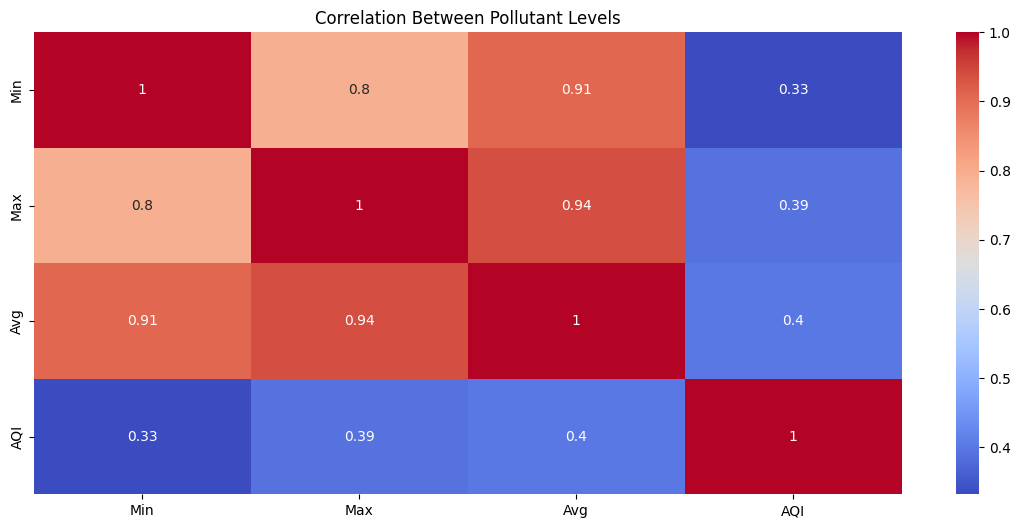

In [ ]:
#correlation heatmap
plt.figure(figsize=(14, 6))
correlation = df[['Min', 'Max', 'Avg', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutant Levels')
plt.show()


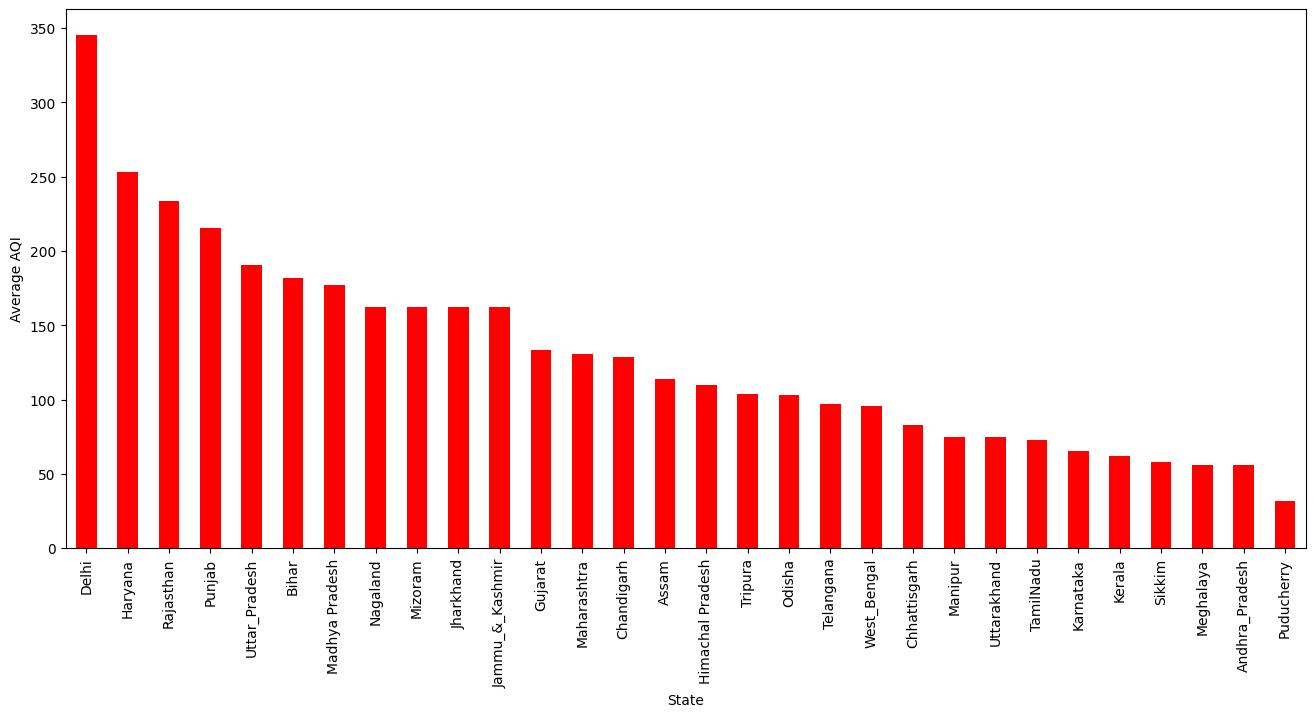

In [ ]:
#bar chart
plt.figure(figsize=(16, 7))
state_aqi = df.groupby('State')['AQI'].mean().sort_values(ascending=False)
state_aqi.plot(kind='bar', color='red')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.show()

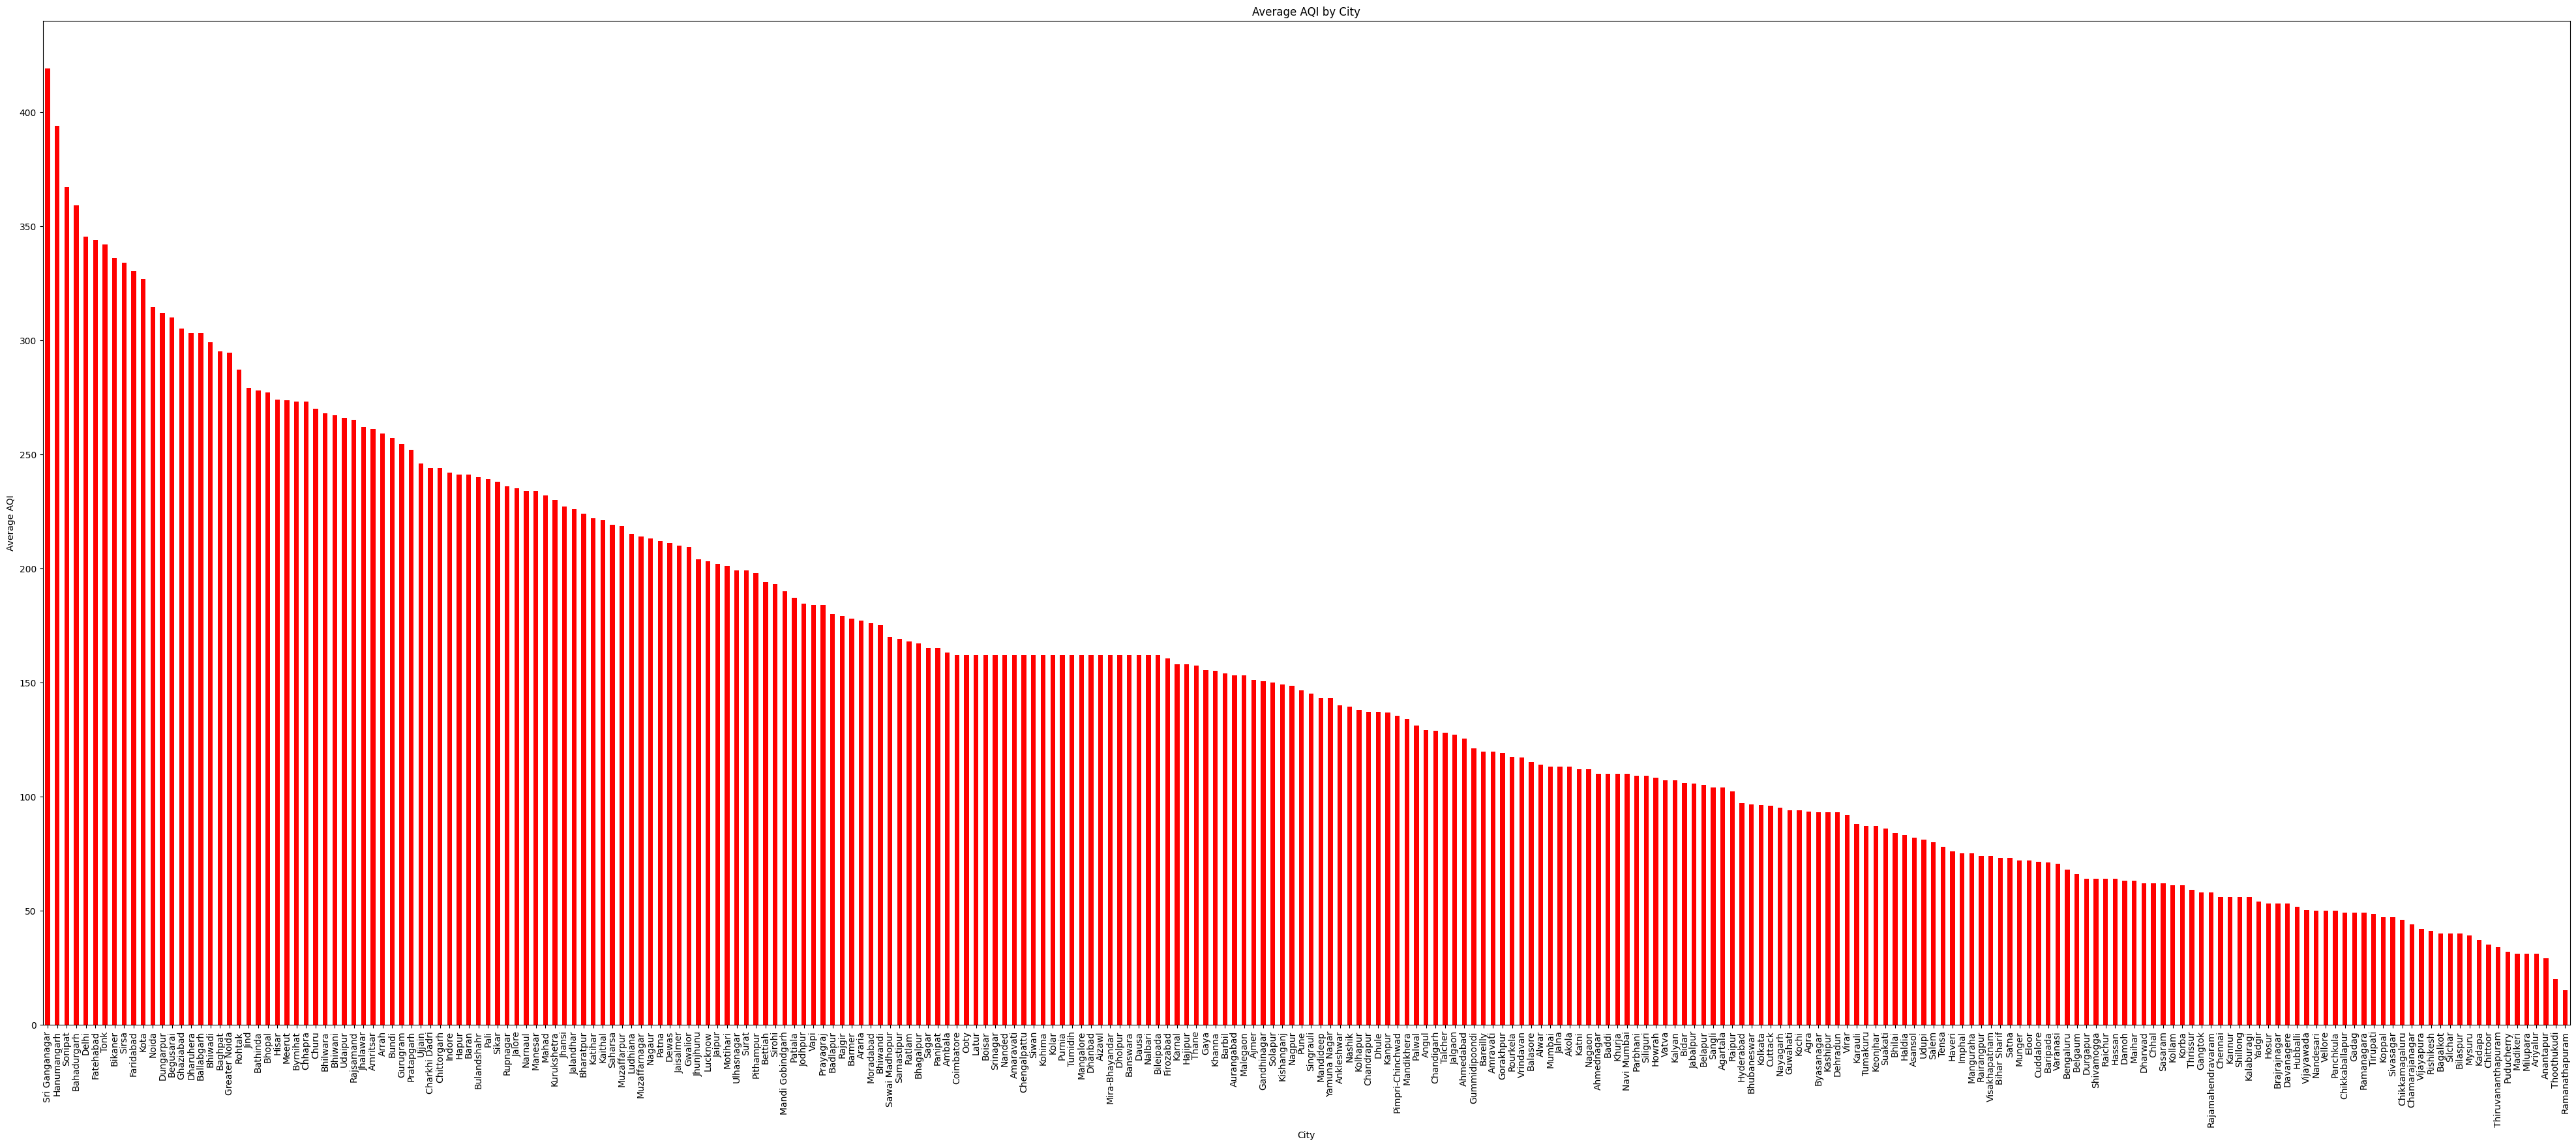

In [ ]:
#bar chart
plt.figure(figsize=(50,20))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_aqi.plot(kind='bar',color='red')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

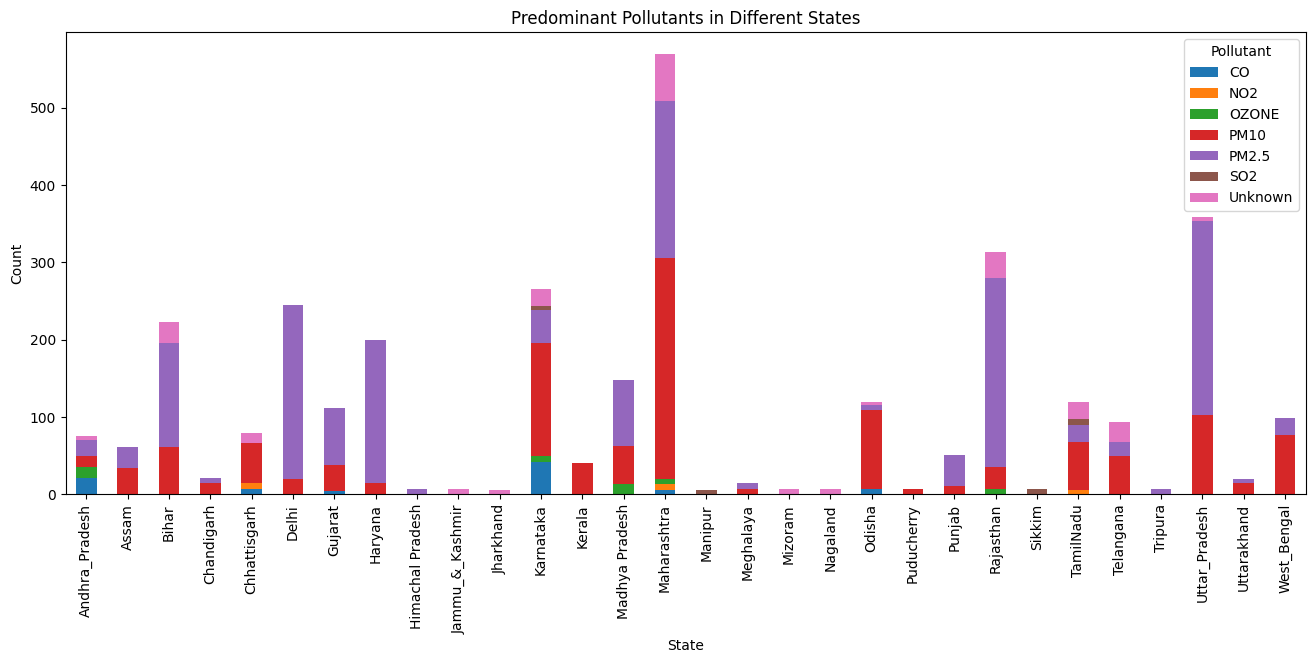

In [ ]:
#bar chart
predominant_pollutants = df.groupby(['State', 'Predominant Parameter']).size().unstack().fillna(0)
predominant_pollutants.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Predominant Pollutants in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Pollutant')
plt.show()

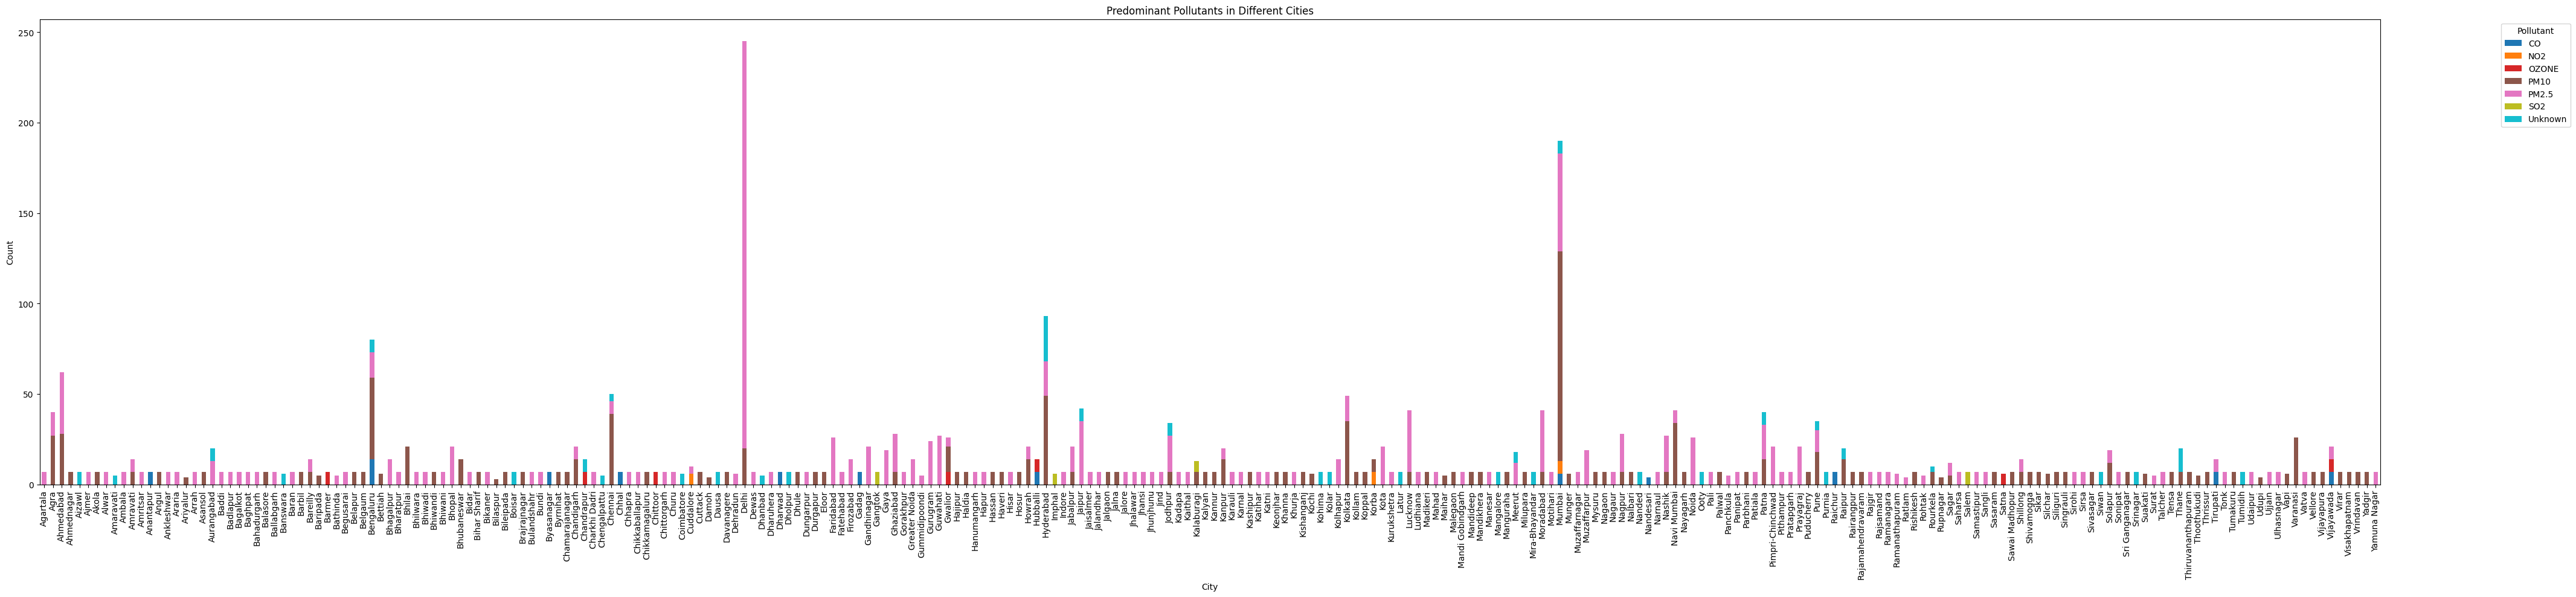

In [ ]:
#bar chart
predominant_pollutants_city = df.groupby(['City', 'Predominant Parameter']).size().unstack().fillna(0)
predominant_pollutants_city.plot(kind='bar', stacked=True, figsize=(50, 10), colormap='tab10')
plt.title('Predominant Pollutants in Different Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

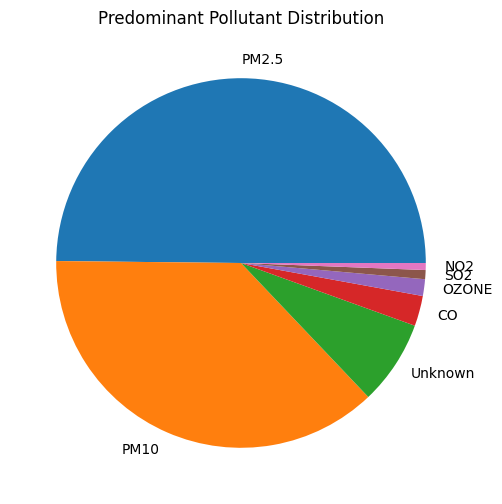

In [ ]:
#pie chart
predominant_pollutants = df['Predominant Parameter'].value_counts()
plt.figure(figsize=(15, 6))
predominant_pollutants.plot(kind='pie')
plt.title('Predominant Pollutant Distribution')
plt.ylabel('')
plt.show()

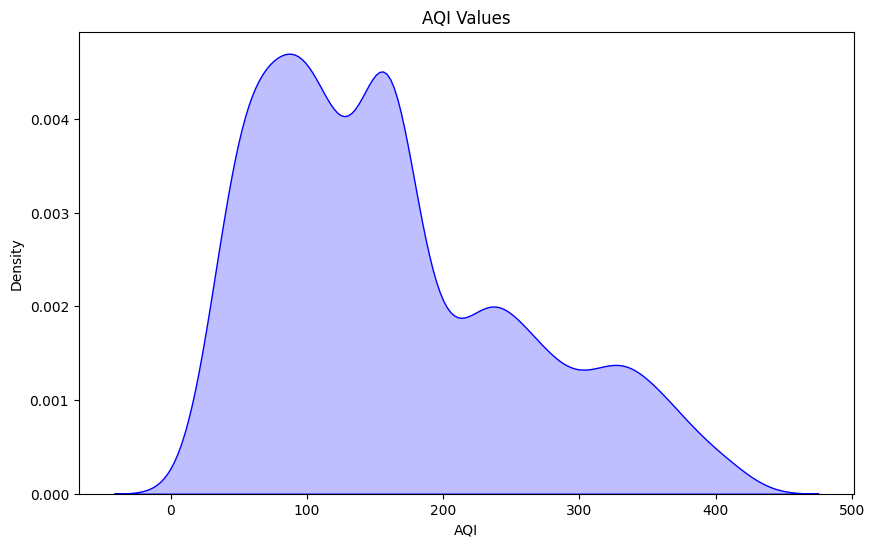

In [ ]:
#density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AQI'], shade=True,color='blue')
plt.title('AQI Values')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

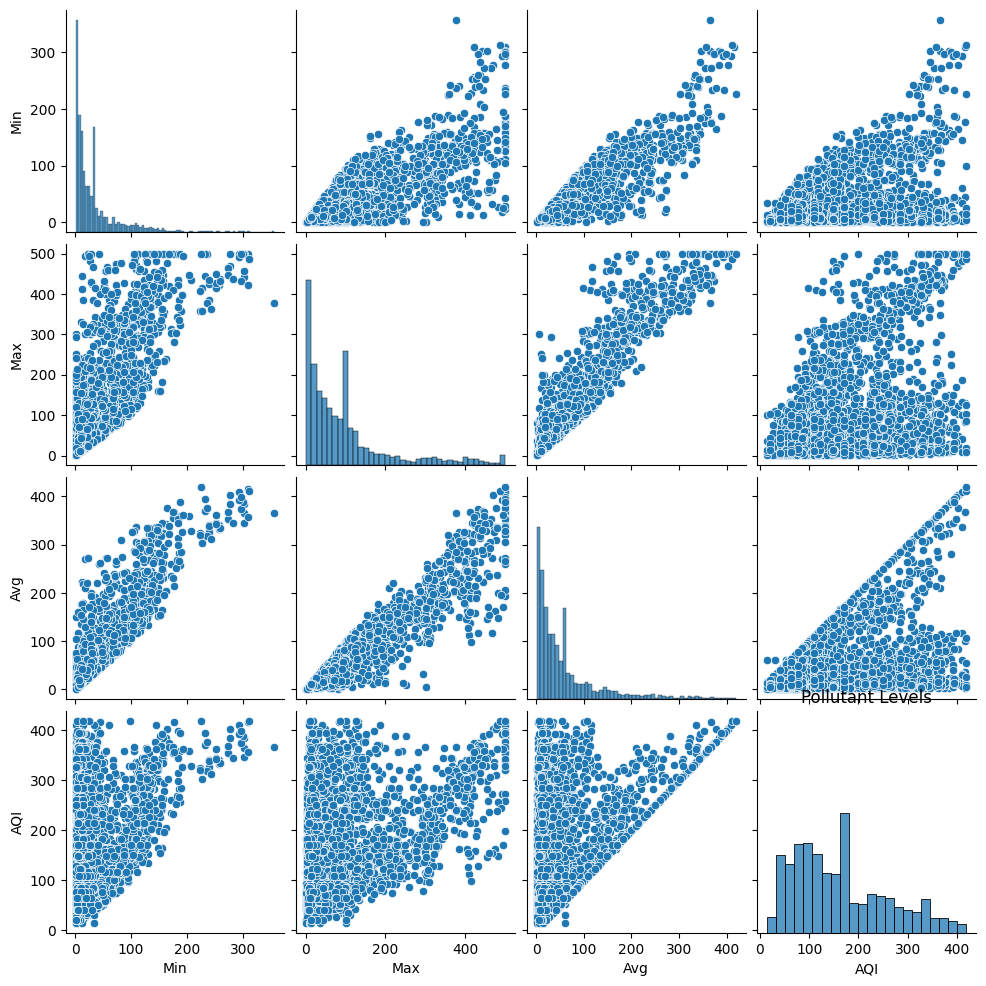

In [ ]:
#paip plot
sns.pairplot(df[['Min', 'Max', 'Avg', 'AQI']], palette='red')
plt.title('Pollutant Levels')
plt.show

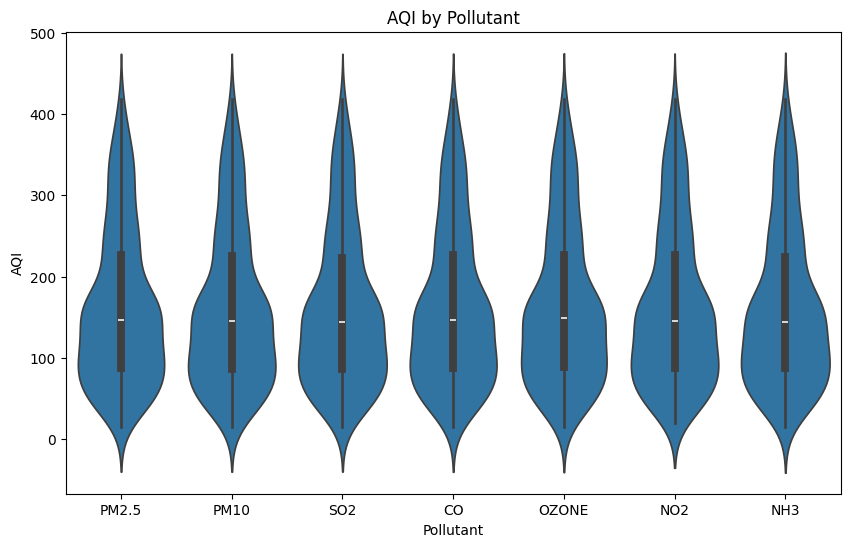

In [ ]:
#violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pollutant', y='AQI', data=df)
plt.title('AQI by Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('AQI')
plt.show()

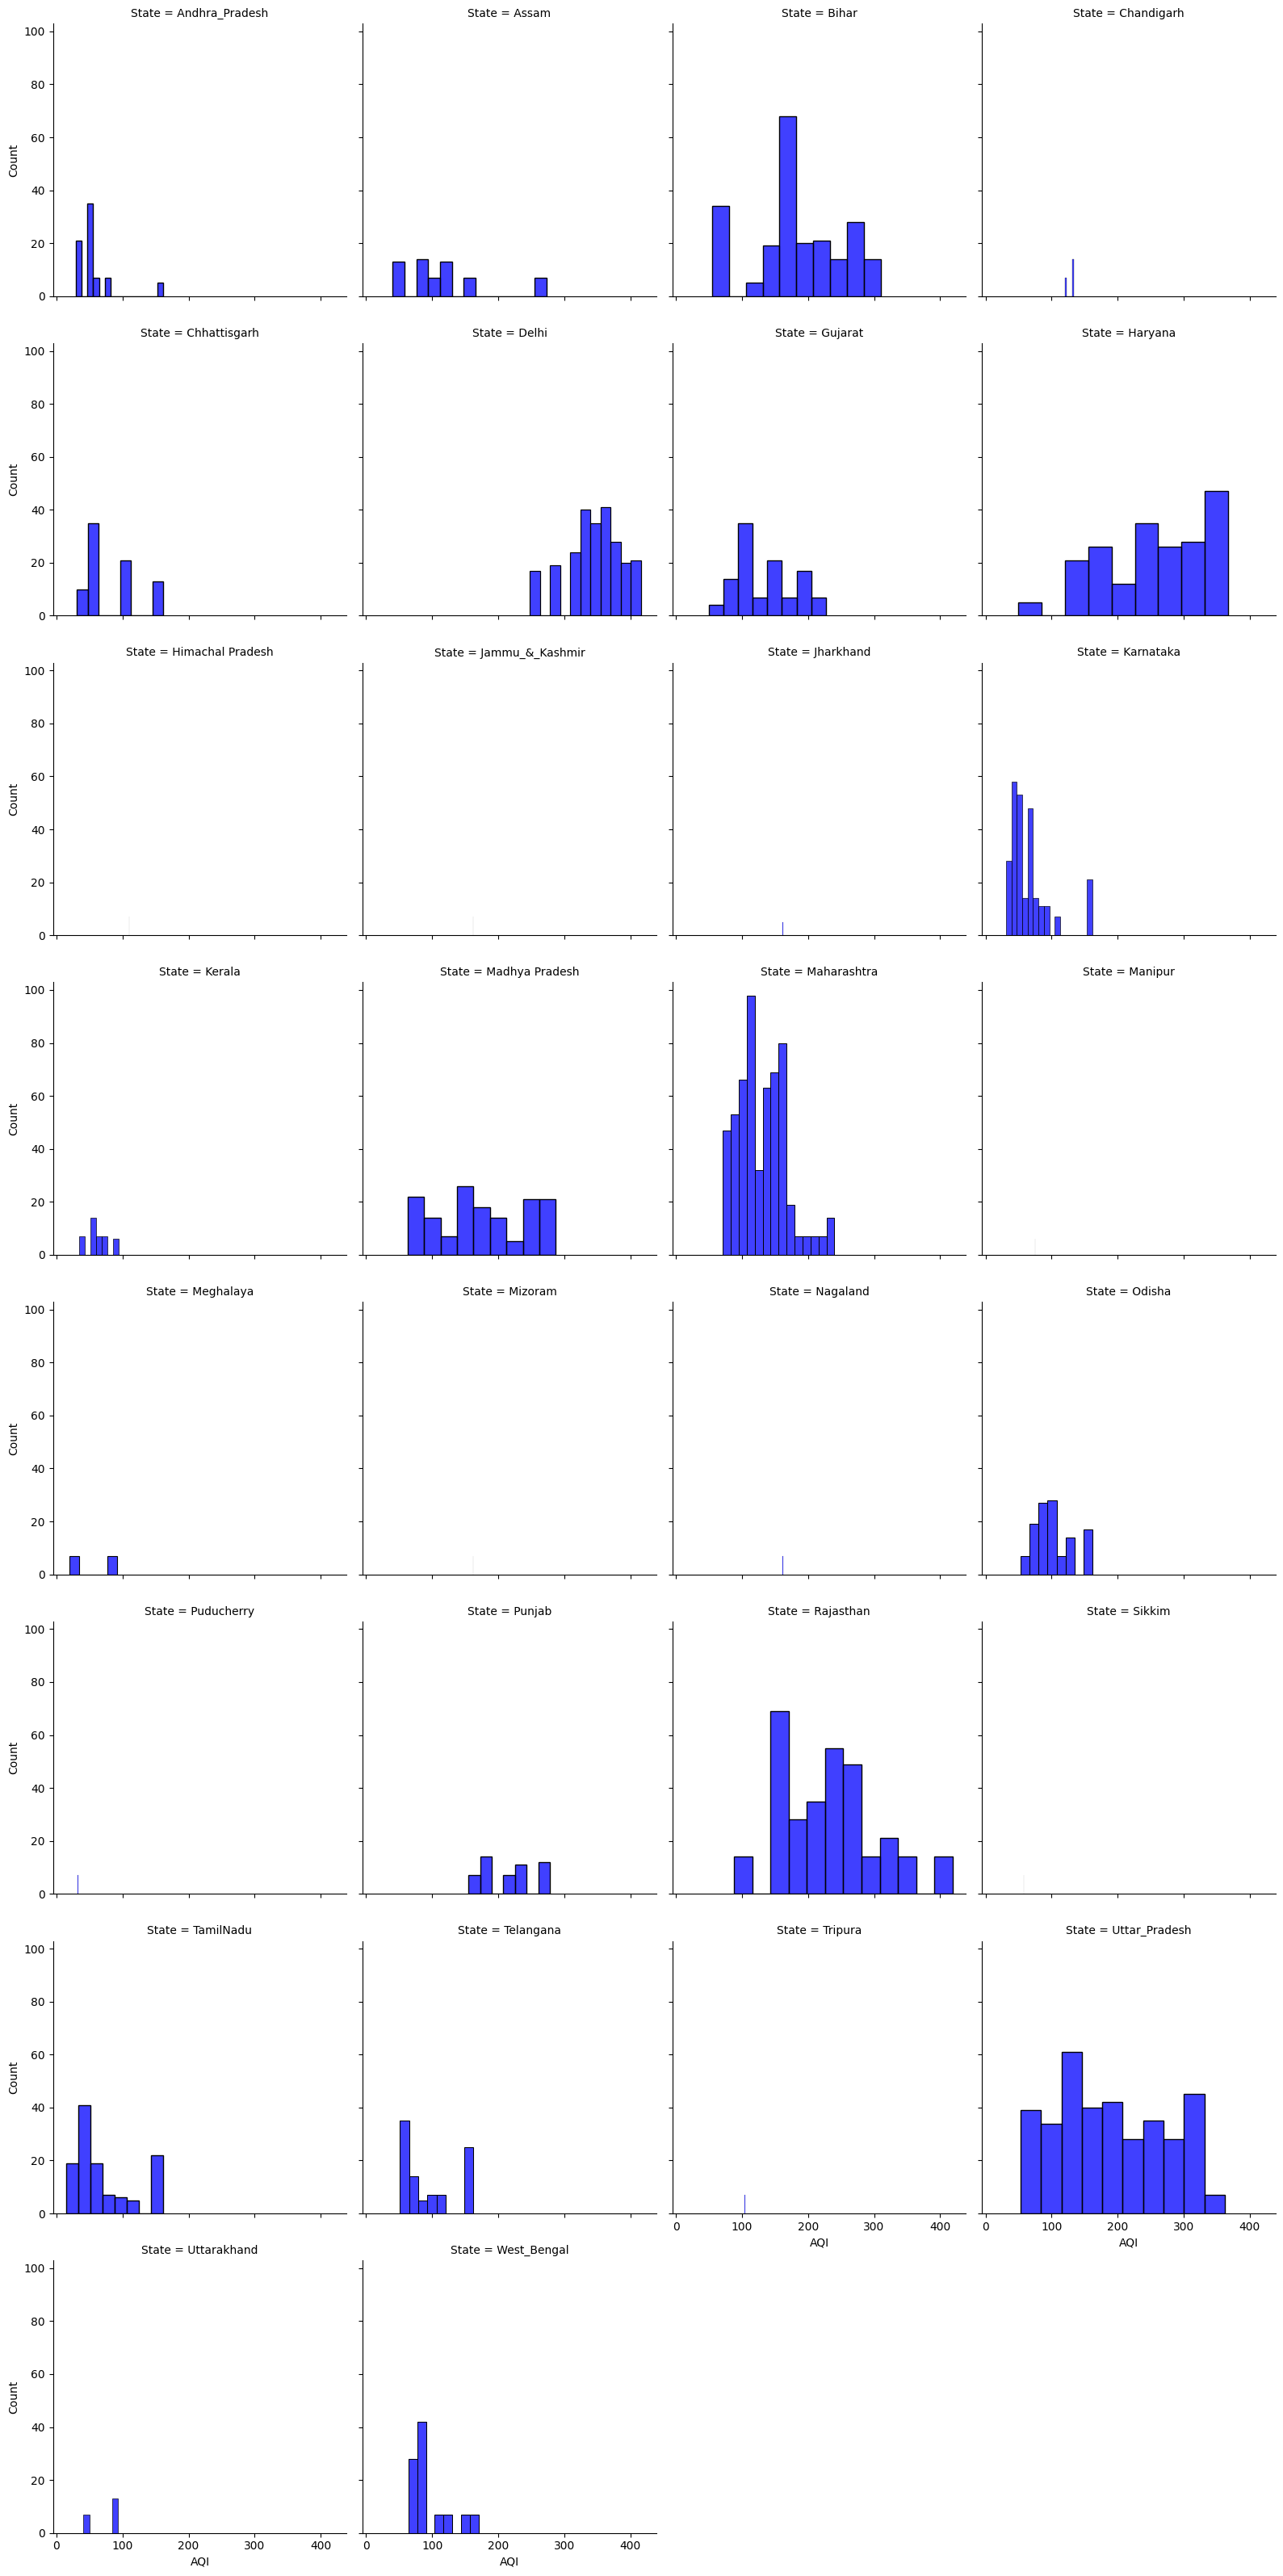

In [ ]:
#hist plot
g = sns.FacetGrid(df, col='State', col_wrap=4, height=4)
g.map(sns.histplot, 'AQI', color='blue')
plt.show()

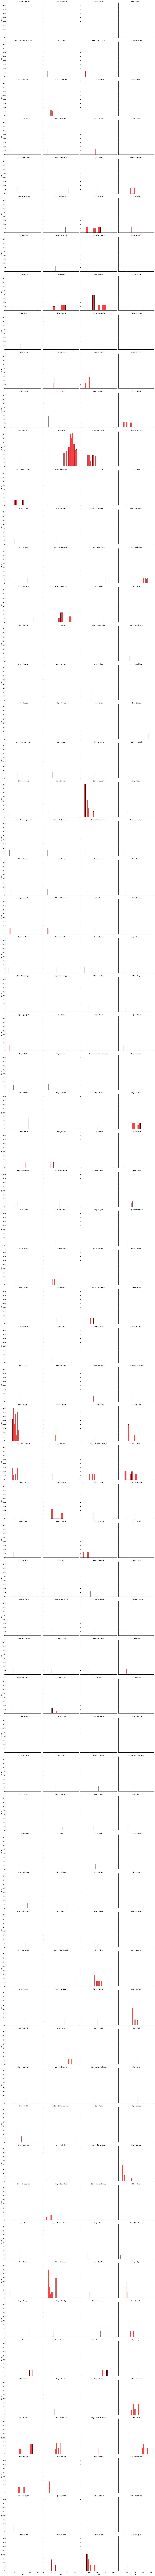

In [ ]:
#hist plot
g = sns.FacetGrid(df, col='City', col_wrap=4, height=4)
g.map(sns.histplot, 'AQI', color='red')
plt.show()

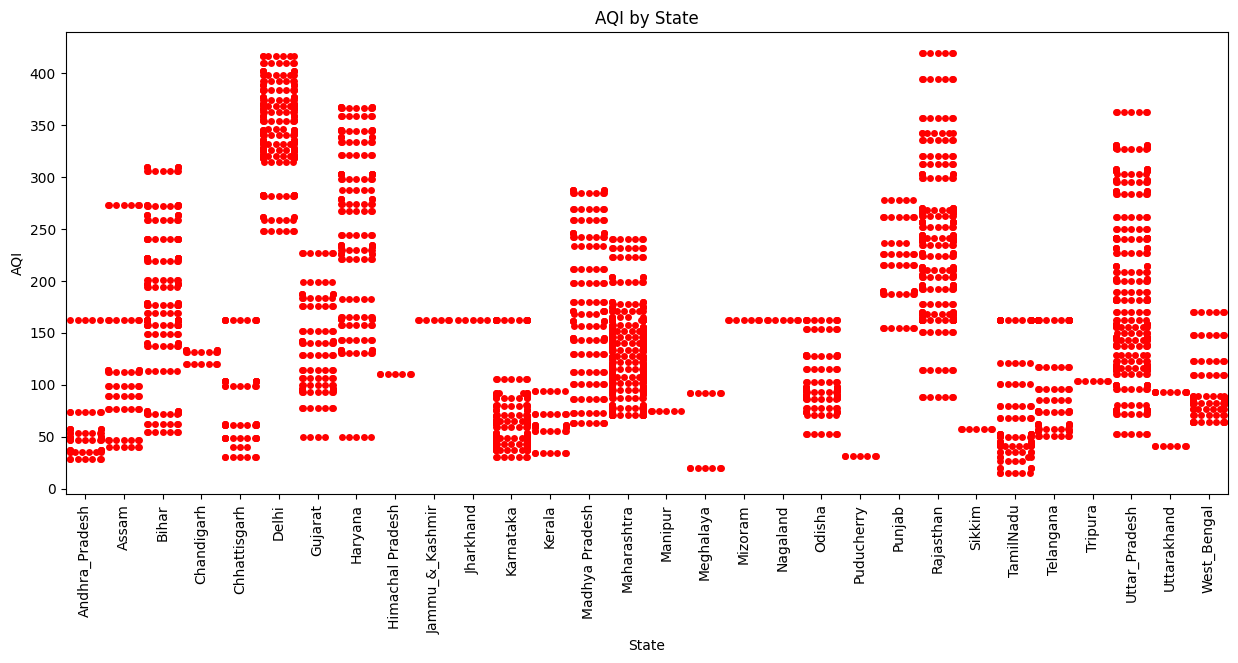

In [ ]:
#swarm plot
plt.figure(figsize=(15, 6))
sns.swarmplot(x='State', y='AQI', data=df, color='red')
plt.title('AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

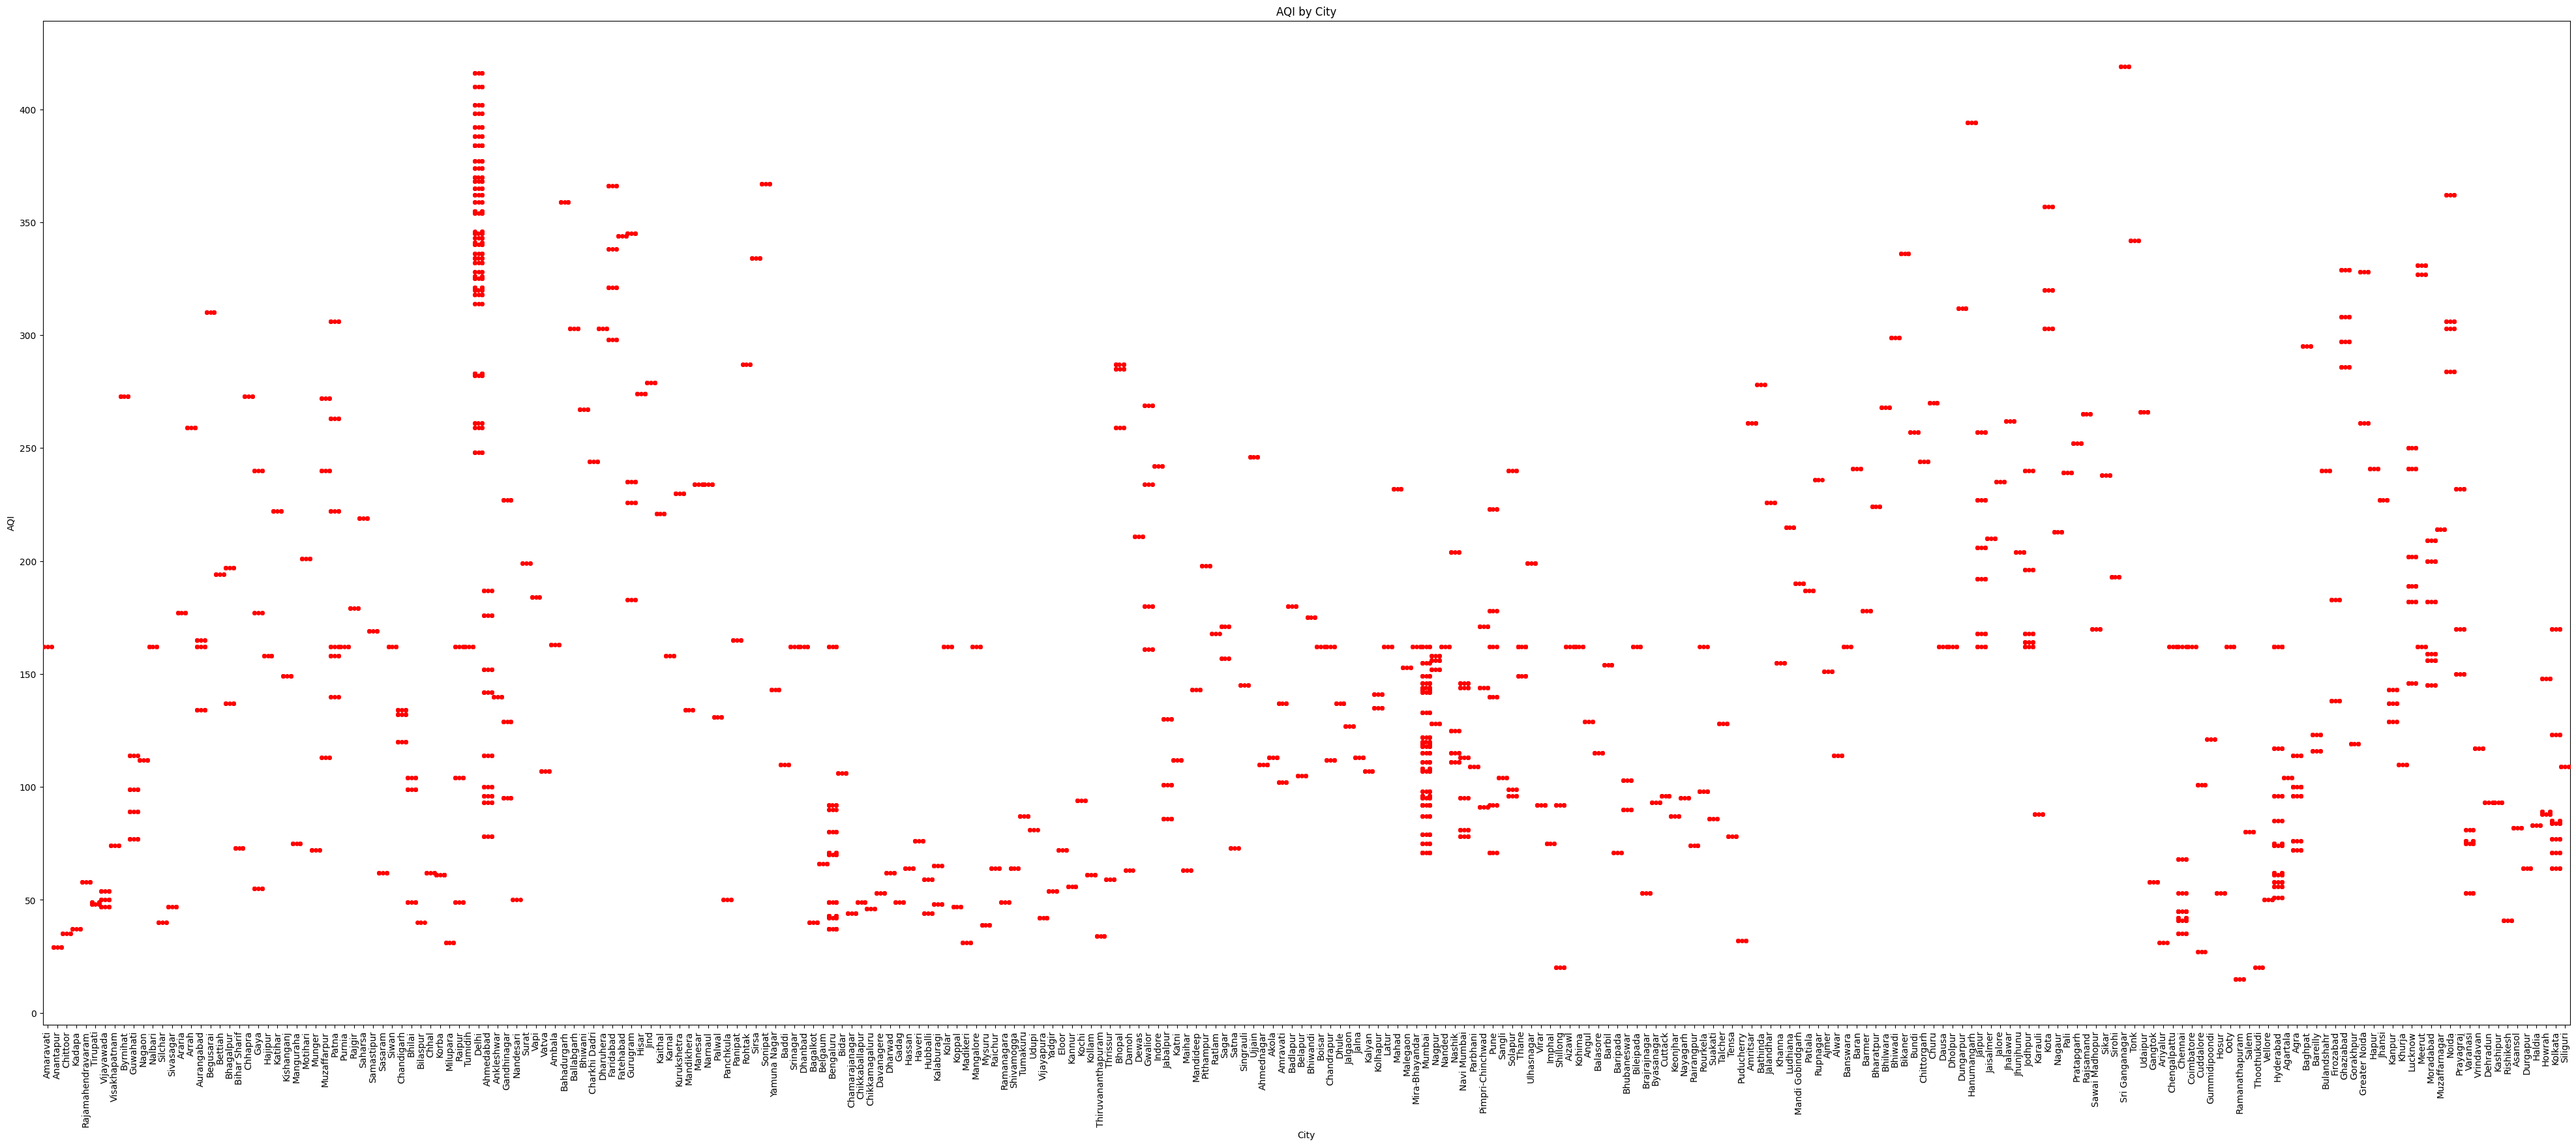

In [ ]:
#swarm plot
plt.figure(figsize=(50, 20))
sns.swarmplot(x='City', y='AQI', data=df, color='red')
plt.title('AQI by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

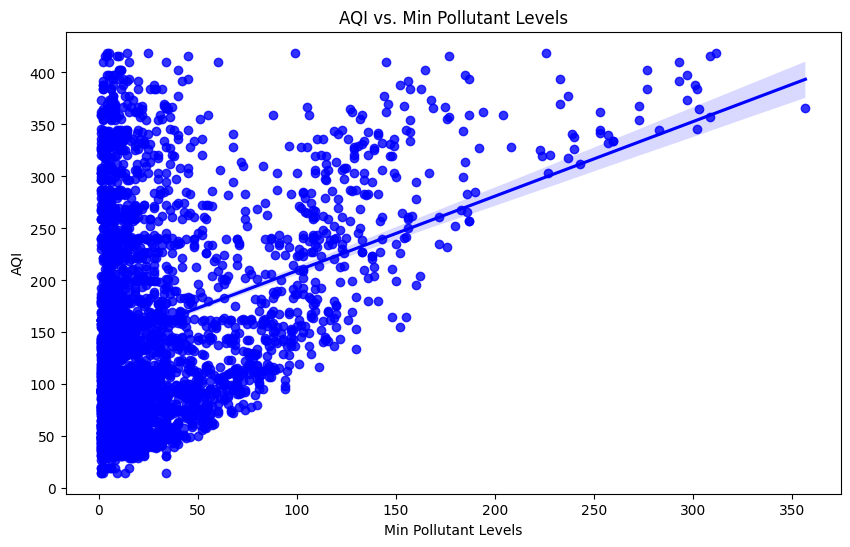

In [ ]:
#reg plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Min', y='AQI', data=df,color='blue')
plt.title('AQI vs. Min Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('AQI')
plt.show()

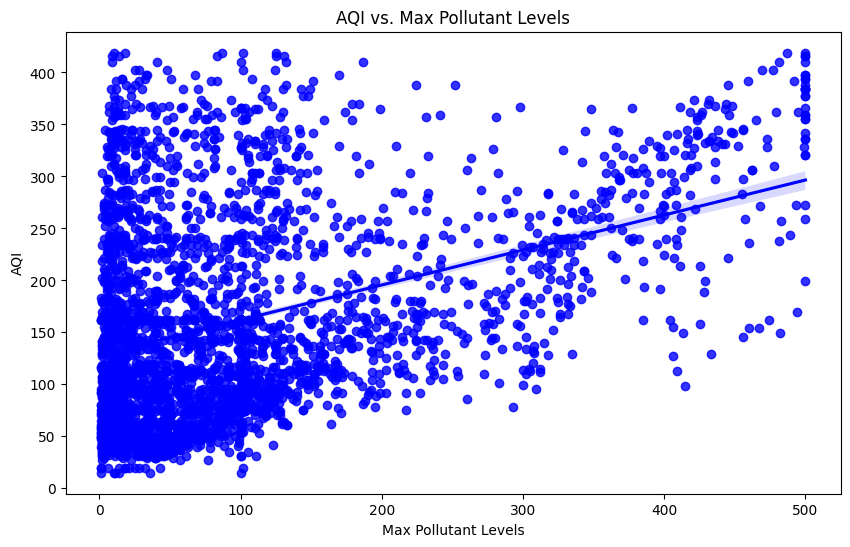

In [ ]:
#reg plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Max', y='AQI', data=df,color='blue')
plt.title('AQI vs. Max Pollutant Levels')
plt.xlabel('Max Pollutant Levels')
plt.ylabel('AQI')
plt.show()

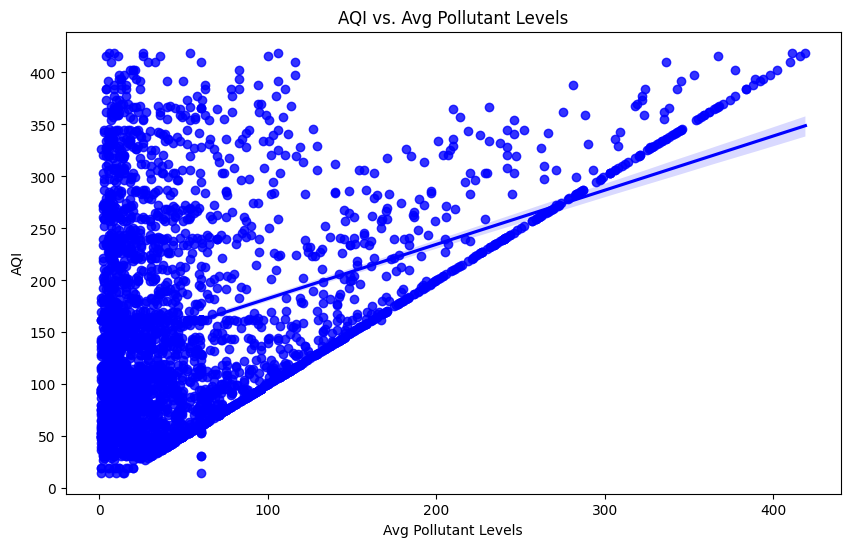

In [ ]:
#reg plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg', y='AQI', data=df,color='blue')
plt.title('AQI vs. Avg Pollutant Levels')
plt.xlabel('Avg Pollutant Levels')
plt.ylabel('AQI')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

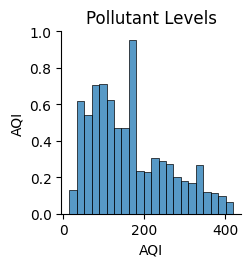

In [ ]:
#paip plot
sns.pairplot(df[['State', 'City', 'Station', 'AQI']], palette='red')
plt.title('Pollutant Levels')
plt.show

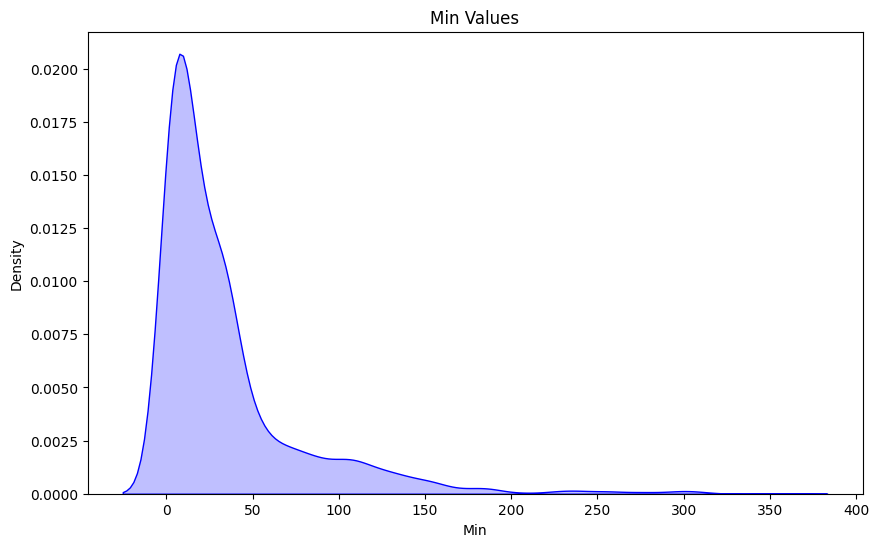

In [ ]:
#density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Min'], shade=True,color='blue')
plt.title('Min Values')
plt.xlabel('Min')
plt.ylabel('Density')
plt.show()

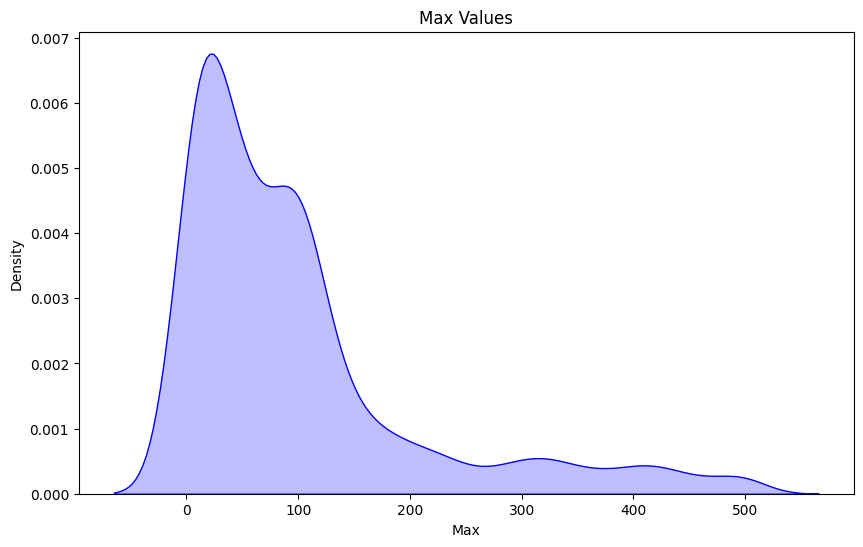

In [ ]:
#density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Max'], shade=True,color='blue')
plt.title('Max Values')
plt.xlabel('Max')
plt.ylabel('Density')
plt.show()

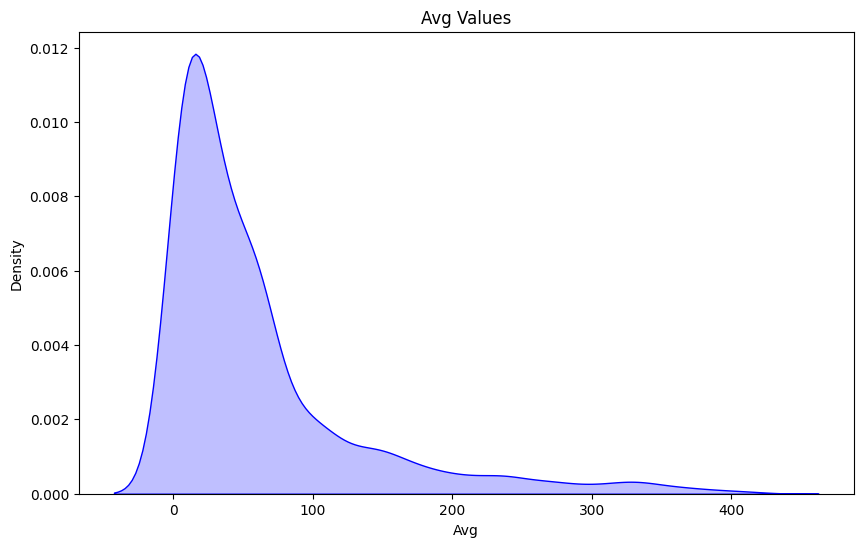

In [ ]:
#density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Avg'], shade=True,color='blue')
plt.title('Avg Values')
plt.xlabel('Avg')
plt.ylabel('Density')
plt.show()